In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import torch
import os
import clip
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import time  # 导入time模块

In [2]:
import torch
print(torch.__version__)
print('GPU:',torch.cuda.is_available())

2.0.0+cu118
GPU: True


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
model, preprocess = clip.load("ViT-B/32", device=device)

image_folder = "D:\\ybx\\gpr-data-classifier-master\\hyperbola-classifier\\test26"
image_files = os.listdir(image_folder)
image_files.sort(key=lambda x: int(x.split('.')[0]))
image_number = len(image_files)
image_feature_set = []

# 添加时间测量的开始点
start_time = time.time()

for filename in image_files:
    image_path = os.path.join(image_folder, filename)
    print("Processing image:", filename)  # 添加这行以打印图像文件名
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        image_feature_individual = model.encode_image(image)
    image_feature_set.append(image_feature_individual.cpu().numpy().reshape(-1))
# 添加时间测量的结束点
end_time = time.time()

image_feature_set = torch.tensor(image_feature_set)
print("Size of image_feature_set:", image_feature_set.size())
print(image_feature_set)  
# 输出程序执行时间
execution_time = end_time - start_time
print("程序执行时间: {:.2f} 秒".format(execution_time))

cuda
Processing image: 0.jpg
Processing image: 1.jpg
Processing image: 2.jpg
Processing image: 3.jpg
Processing image: 4.jpg
Processing image: 5.jpg
Processing image: 6.jpg
Processing image: 7.jpg
Processing image: 8.jpg
Processing image: 9.jpg
Processing image: 10.png
Processing image: 11.png
Processing image: 12.png
Processing image: 13.png
Processing image: 14.png
Processing image: 15.png
Processing image: 16.png
Processing image: 17.png
Processing image: 18.png
Processing image: 19.png
Processing image: 20.jpg
Processing image: 21.jpg
Processing image: 22.jpg
Processing image: 23.jpg
Processing image: 24.jpg
Processing image: 25.jpg
Processing image: 26.jpg
Processing image: 27.jpg
Processing image: 28.jpg
Processing image: 29.jpg
Processing image: 30.png
Processing image: 31.png
Processing image: 32.png
Processing image: 33.png
Processing image: 34.png
Processing image: 35.png
Processing image: 36.png
Processing image: 37.png
Processing image: 38.png
Processing image: 39.png
Proce

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13688\2734556952.py:24: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  image_feature_set = torch.tensor(image_feature_set)


In [4]:
distance_matrix = np.zeros((image_number, image_number))

for index0 in range(0, image_number):
    for index1 in range(index0+1, image_number):
        pair_distance = distance.cosine(image_feature_set[index0], image_feature_set[index1])
        distance_matrix[index0, index1] = pair_distance
        distance_matrix[index1, index0] = pair_distance

print(distance_matrix)
print(distance_matrix.shape)


[[0.         0.06933594 0.03613281 ... 0.08642578 0.07275391 0.05664062]
 [0.06933594 0.         0.10058594 ... 0.09570312 0.08837891 0.08349609]
 [0.03613281 0.10058594 0.         ... 0.10888672 0.09521484 0.07470703]
 ...
 [0.08642578 0.09570312 0.10888672 ... 0.         0.02294922 0.02929688]
 [0.07275391 0.08837891 0.09521484 ... 0.02294922 0.         0.02636719]
 [0.05664062 0.08349609 0.07470703 ... 0.02929688 0.02636719 0.        ]]
(70, 70)


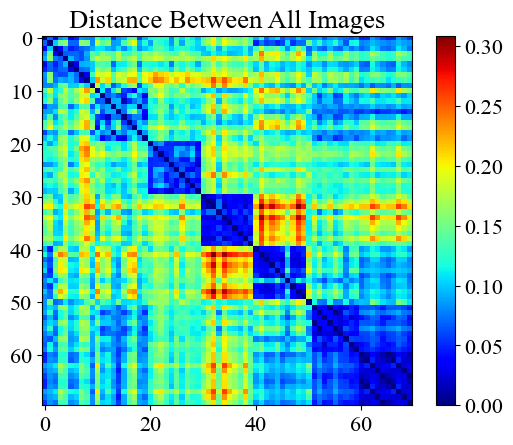

In [5]:
# 设置全局字体为 Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
# 设置全体字体大小
plt.rc('font', size=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

plt.imshow(distance_matrix, cmap='jet')
plt.title(f'Distance Between All Images')
plt.colorbar()
plt.show()

D:\Anaconda\envs\pytorch\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
D:\Anaconda\envs\pytorch\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
D:\Anaconda\envs\pytorch\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keywo

(70, 2)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13688\2463866667.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', len(color_bins))


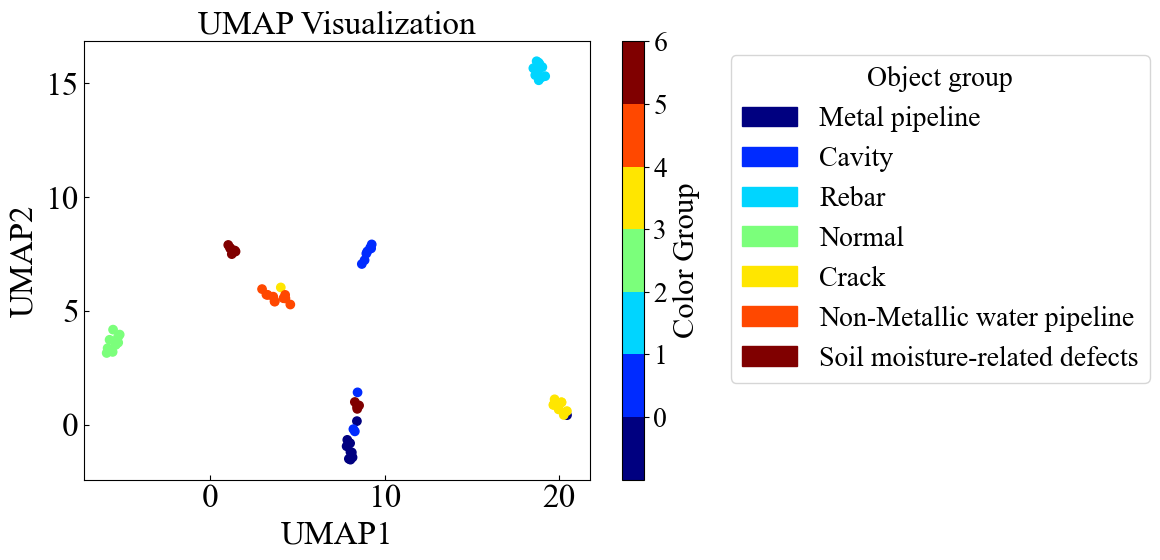

In [6]:
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Patch
from matplotlib.path import Path

# 假设你已经有了 Umap 数据和 distance_matrix 数据
# Umap = ...
# distance_matrix = ...

# 设置全局字体为 Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.lines import Line2D


# 设置全局字体为 Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'


# 设置全体字体大小
plt.rc('font', size=20)
plt.rc('axes', labelsize=22)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

# 已经定义了distance_matrix和UMAP_distance


UMAP_distance = umap.UMAP(n_neighbors=5,
                            min_dist=0.1,
                            n_components=2,
                           random_state=43,
                            metric='precomputed')  #euclidean cosine

UMAP_distance.fit(distance_matrix)
Umap = UMAP_distance.embedding_
print(Umap.shape)

# 定义颜色分组
color_bins = [10,20,30,40,50,60,69]

# 获取颜色映射
cmap = cm.get_cmap('jet', len(color_bins))

# 将每个点分配到对应的颜色组别
color_group = np.digitize(np.arange(Umap.shape[0]), color_bins) - 1

# 创建形状列表，与颜色分组一一对应
shapes = ['Metal pipeline','Cavity','Rebar','Normal','Crack','Non-Metallic water pipeline','Soil moisture-related defects']  # 钢筋、空洞、管线,含水空洞
#shpaes=['void','Water-filled Void']
plt.figure(figsize=(12, 6))
scatter = plt.scatter(Umap[:, 0], Umap[:, 1], c=color_group, cmap=cmap, s=36)
plt.xlabel('UMAP1', fontsize='large')
plt.ylabel('UMAP2', fontsize='large')
plt.tick_params(direction='in', labelsize='large')
plt.colorbar(scatter, ticks=range(len(color_bins)), label='Color Group')

# 创建图例
legend_handles = []
for i, shape in enumerate(shapes):
    legend_handles.append(Patch(color=cmap(i), label=shape))

plt.legend(handles=legend_handles, title='Object group', loc='upper left', bbox_to_anchor=(1.25, 1))

plt.title('UMAP Visualization')

#for index in range(60,69):
   # plt.text(Umap[index,0],Umap[index,1],s=str(index),fontsize=13, ha='right',va='bottom',color='black')


plt.tight_layout()
plt.show()

D:\Anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

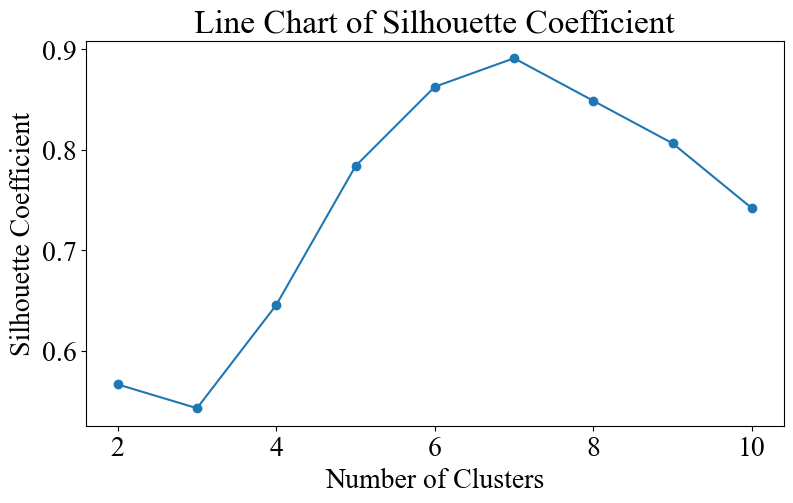

D:\Anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


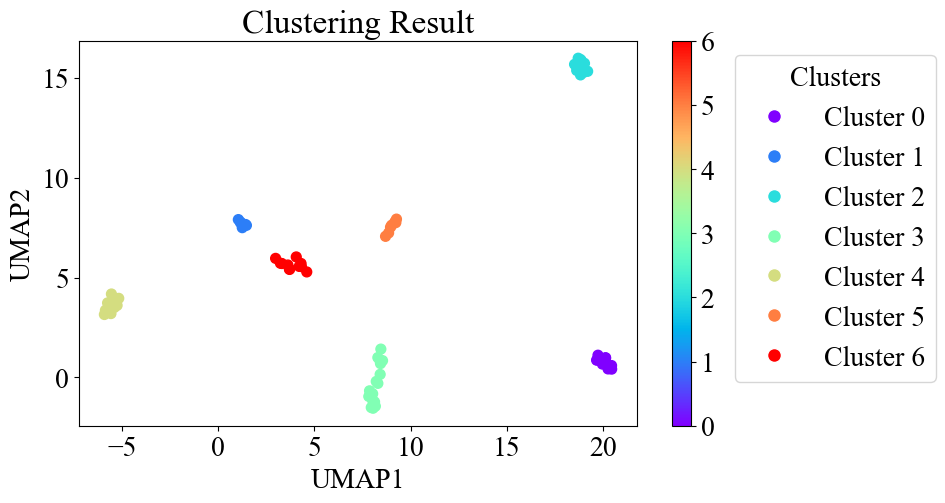

In [7]:
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.lines import Line2D


# 设置全局字体为 Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'


# 设置全体字体大小
plt.rc('font', size=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

# 已经定义了distance_matrix和UMAP_distance

# 将距离矩阵映射到二维空间
Umap = UMAP_distance.embedding_

# 尝试不同的聚类数量并计算轮廓系数
num_clusters_range = range(2, 11)
silhouette_scores = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    labels = kmeans.fit_predict(Umap)
    
    silhouette_avg = silhouette_score(Umap, labels)
    rounded_silhouette_avg = round(silhouette_avg, 5)  # 保留3位小数
    silhouette_scores.append(rounded_silhouette_avg)

# 绘制轮廓系数折线图
plt.figure(figsize=(9, 5))
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Line Chart of Silhouette Coefficient')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(False)
plt.show()

# 找到最佳聚类数量
best_num_clusters = num_clusters_range[np.argmax(silhouette_scores)]

# 使用最佳聚类数量进行 K-Means 聚类
best_kmeans = KMeans(n_clusters=best_num_clusters, random_state=0)
best_labels = best_kmeans.fit_predict(Umap)

# 绘制聚类结果的点图
plt.figure(figsize=(9, 5))
scatter = plt.scatter(Umap[:, 0], Umap[:, 1], c=best_labels, cmap='rainbow', s=50)

# 手动创建图例
unique_labels = np.unique(best_labels)
legend_labels = [f'Cluster {label}' for label in unique_labels]

# 设置图例位置在图像右上角外部
legend_elements = [Line2D([0], [0], marker='o', color='w', label=legend_labels[i],
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10) for i, label in enumerate(unique_labels)]
legend = plt.legend(handles=legend_elements, title="Clusters", bbox_to_anchor=(1.15, 1), loc='upper left')

plt.title('Clustering Result')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

plt.grid(False)
plt.colorbar(scatter, ticks=unique_labels)

plt.show()